In [ ]:
# create train/ test-val dataset with missing/ placeholder values with the 26 sensor dataset
# tasks: 
    # a. create individual missing values
    # b. create sequence of missing values

In [1]:
import numpy as np
import pandas as pd

In [38]:
# introduce missing single placeholder values (0,1,-1) at random at a dataset

def introduce_missing_values(df, missing_percentage, placeholder_value, seed=None):
    if seed is not None:
        np.random.seed(seed)
    for col in df.columns:
        num_missing_values = int(len(df) * missing_percentage)
        #print(f"Introducing {num_missing_values} missing values in column {col}")
        if num_missing_values >= len(df):
            missing_indices = df.index
        else:
            missing_indices = np.random.choice(df.index, num_missing_values, replace=num_missing_values >= len(df))
        df.loc[missing_indices, col] = placeholder_value
    return df

existing_dataset = pd.read_csv('../data/complete/26 sensors/speedx26_train.csv',header=None)

missing_percentage = .15
placeholder_value = 1
seed = 123   # Set seed value for reproducibility

modified_dataset = introduce_missing_values(existing_dataset, missing_percentage, placeholder_value, seed)

modified_dataset.to_csv(f'../data/26 sensors/speedx26_train_with_missing_{placeholder_value}.csv', index=False, header=False)

print("Modified dataset with missing values has been saved")


Modified dataset with missing values has been saved


In [8]:
# introduce missing values in a sequence with decreasing probability with each steps

import pandas as pd
import numpy as np

def introduce_sequence_missing_values(df, missing_percentage, placeholder_value, seed=None):
    if seed is not None:
        np.random.seed(seed)
    for col in df.columns:
        num_missing_values = int(len(df) * missing_percentage)
        if num_missing_values >= len(df):
            missing_indices = df.index
        else:
            missing_indices = np.random.choice(df.index, num_missing_values, replace=False)
            # Sort the missing indices
            missing_indices.sort()
            # Initialize the number of consecutive missing values
            consecutive_missing = 0
            for i in missing_indices:
                # Generate a random number
                rand_num = np.random.random()
                # Calculate the probability for the current missing value
                probability = 0.75 ** consecutive_missing
                if rand_num < probability:
                    # Set the current value to the placeholder value
                    df.at[i, col] = placeholder_value
                    # Increment the number of consecutive missing values
                    consecutive_missing += 1
                else:
                    # Reset the number of consecutive missing values
                    consecutive_missing = 0
    return df

existing_dataset = pd.read_csv('../data/26 sensors/complete/speedx26_val_test.csv', header=None)

missing_percentage = 0.15
placeholder_value = 0
seed = 123   # Set seed value for reproducibility

modified_dataset = introduce_sequence_missing_values(existing_dataset, missing_percentage, placeholder_value, seed)

modified_dataset.to_csv(f'../data/26 sensors/missing sequence with probability/speedx26_val_test_sequence_missing_{placeholder_value}.csv', index=False, header=False)

print("Modified dataset with missing values has been saved")


Modified dataset with missing values has been saved


In [5]:
import pandas as pd
import numpy as np

def introduce_missing_values(df, missing_percentage, placeholder_value, seed=None):
    if seed is not None:
        np.random.seed(seed)
    for col in df.columns:
        num_missing_values = int(len(df) * missing_percentage)
        if num_missing_values >= len(df):
            missing_indices = df.index
        else:
            missing_indices = np.random.choice(df.index, num_missing_values, replace=num_missing_values >= len(df))
        df.loc[missing_indices, col] = placeholder_value
    return df

def add_consecutive_missing_values(df, placeholder_value, probability):
    for col in df.columns:
        consecutive_missing = 0
        for i in range(len(df)):
            rand_num = np.random.random()
            if rand_num < probability ** consecutive_missing:
                df.at[i, col] = placeholder_value
                consecutive_missing += 1
            else:
                consecutive_missing = 0
    return df

existing_dataset = pd.read_csv('../data/26 sensors/complete/speedx26_val_test.csv',header=None)

missing_percentage = 0.15
placeholder_value = 1
seed = 123   # Set seed value for reproducibility

modified_dataset = introduce_missing_values(existing_dataset, missing_percentage, placeholder_value, seed)
modified_dataset_with_consecutive_missing = add_consecutive_missing_values(modified_dataset, placeholder_value, 0.75)

modified_dataset_with_consecutive_missing.to_csv(f'../data/26 sensors/missing sequence with probability/speedx26_val_test_with_missing_{placeholder_value}_2.csv', index=False, header=False)

print("Modified dataset with missing values has been saved")


Modified dataset with missing values has been saved


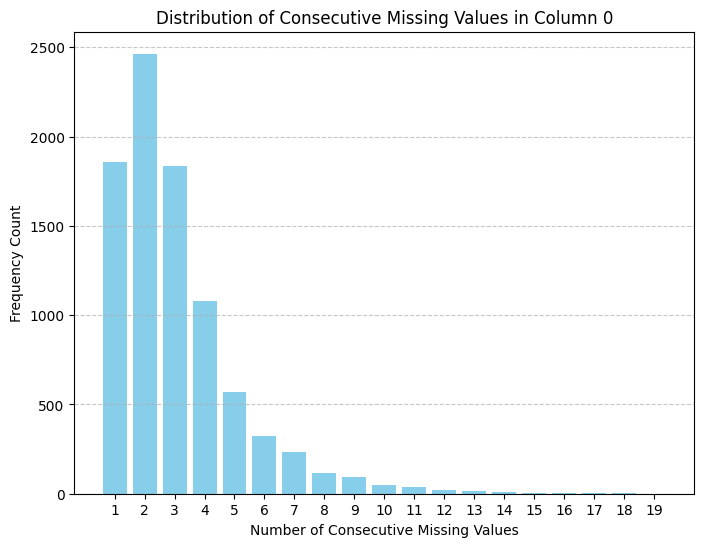

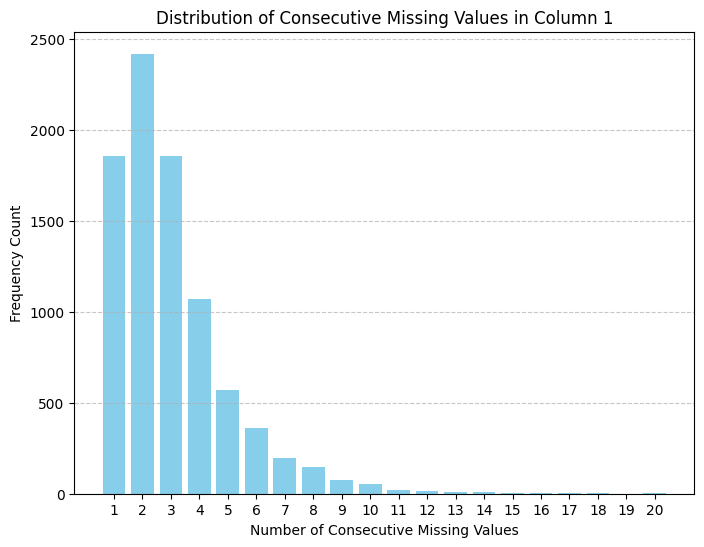

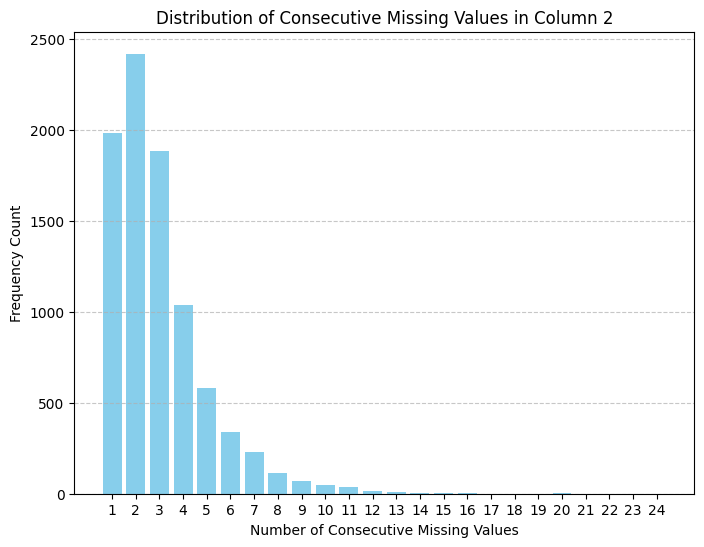

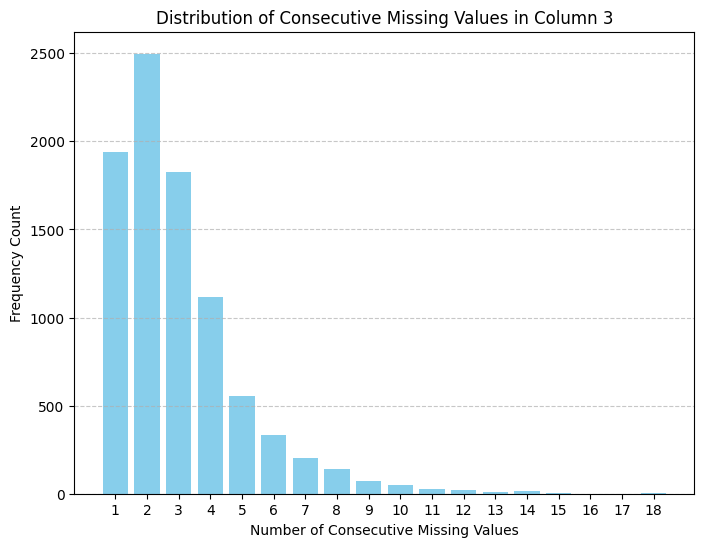

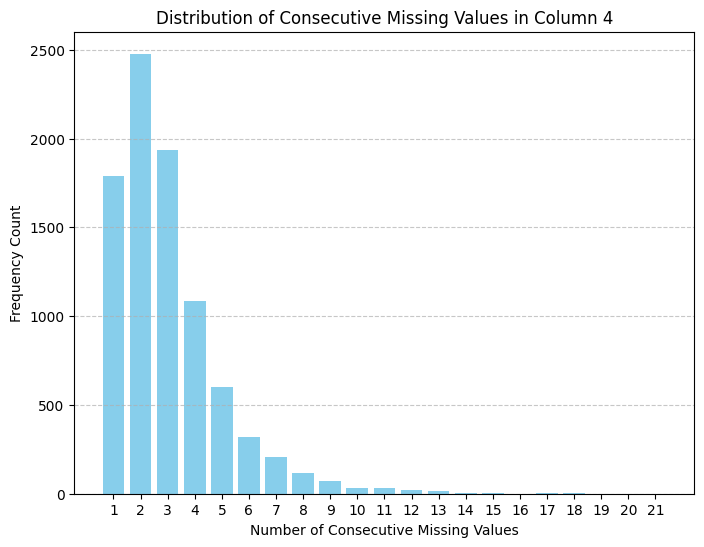

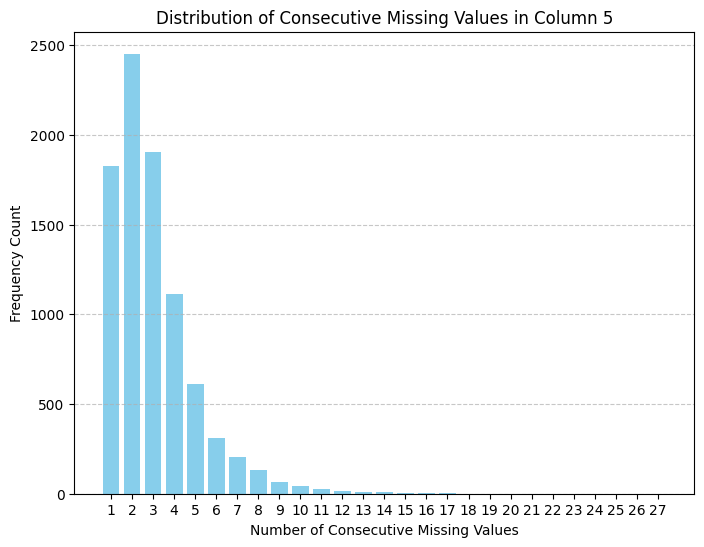

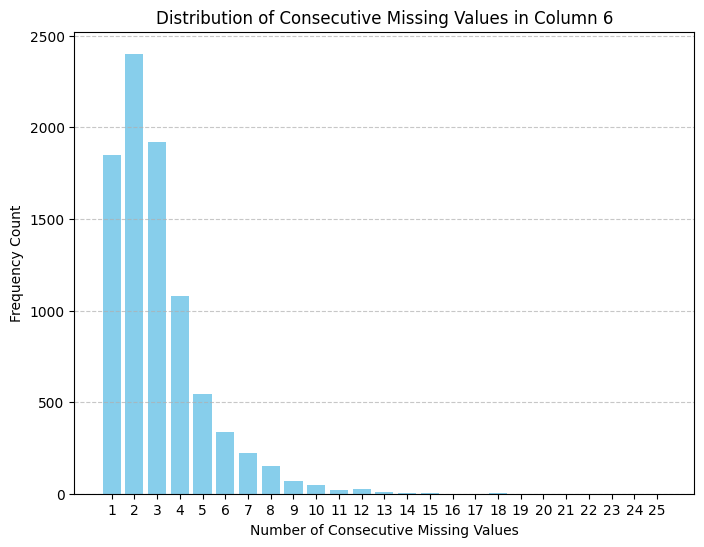

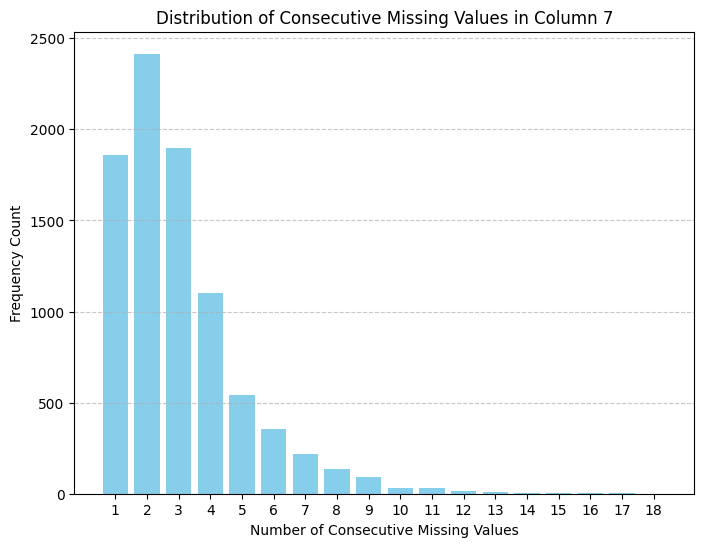

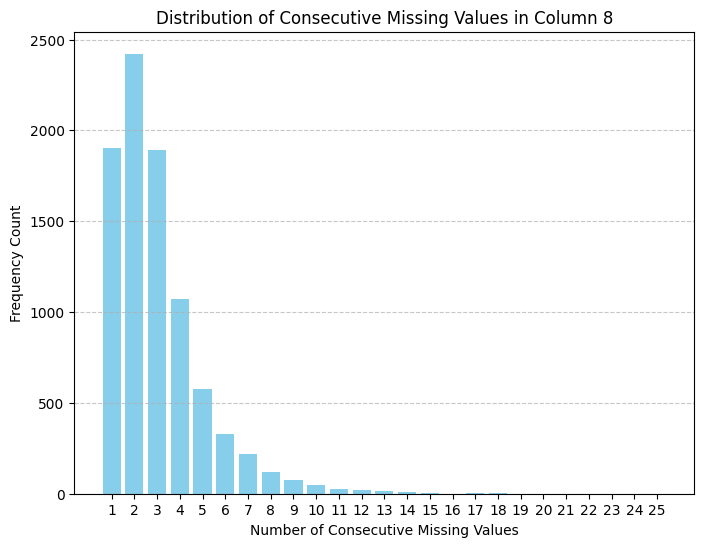

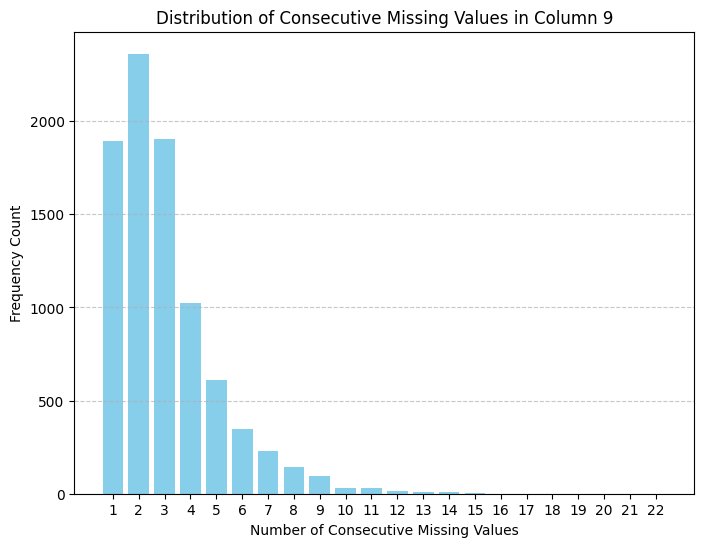

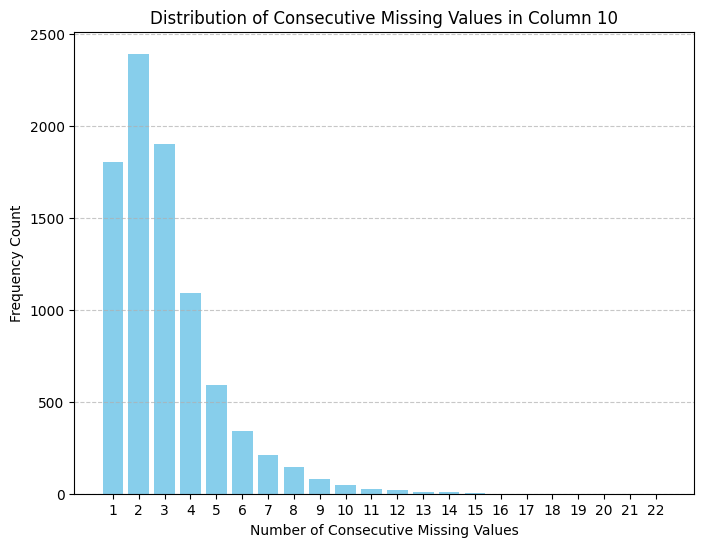

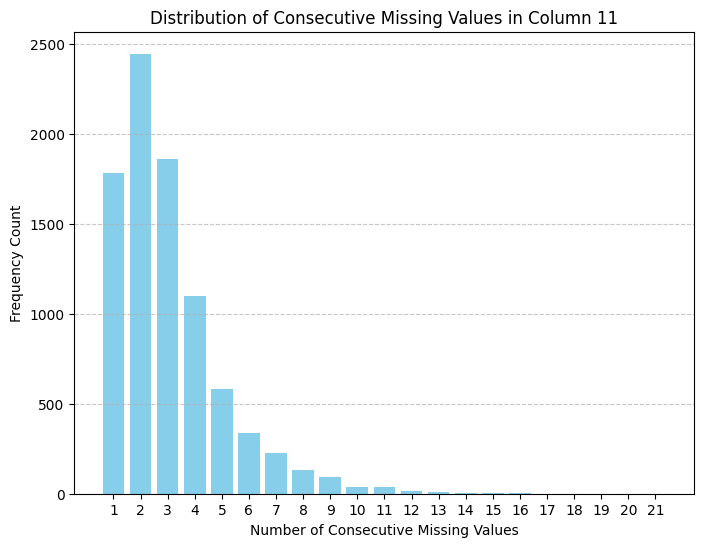

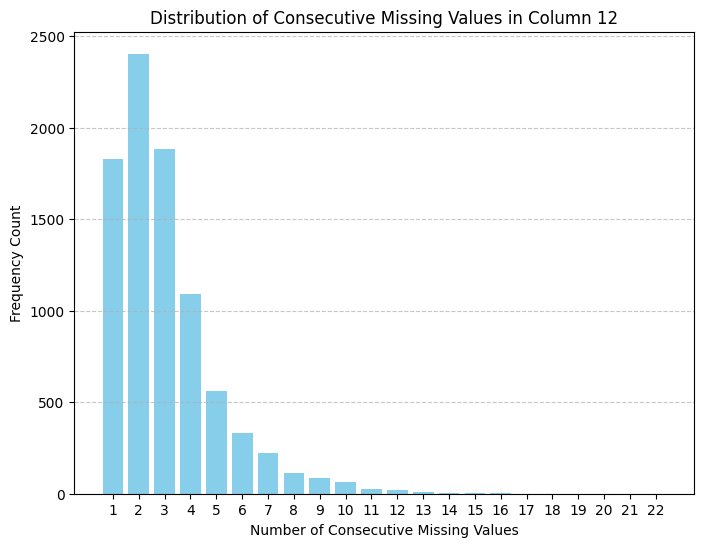

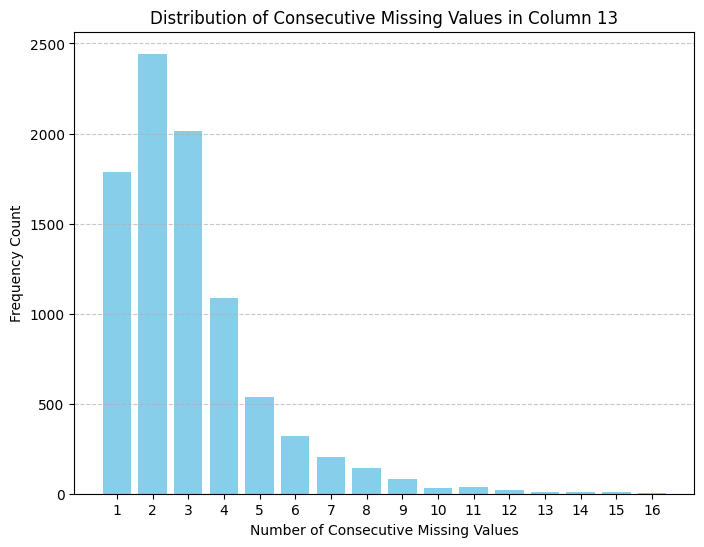

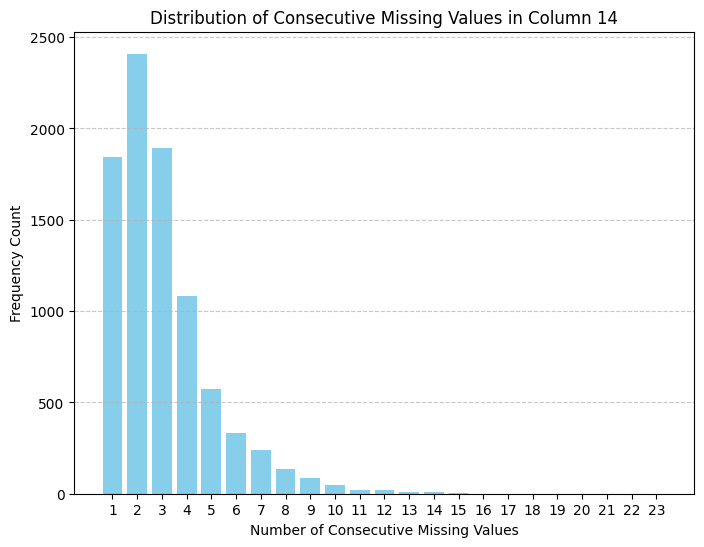

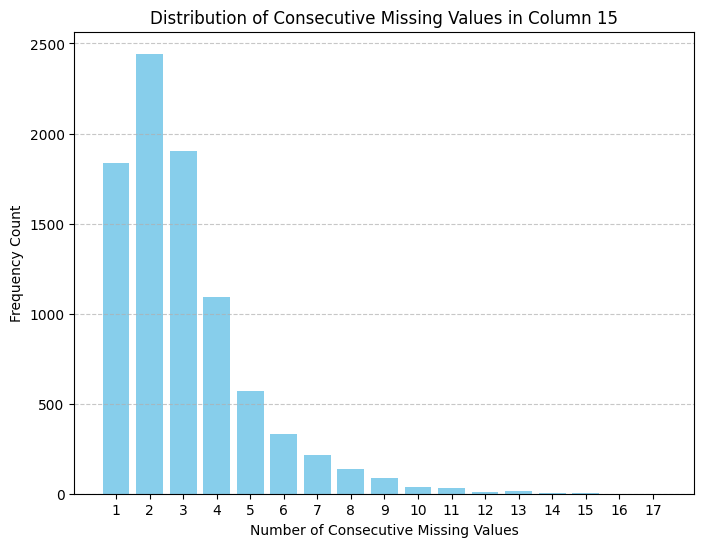

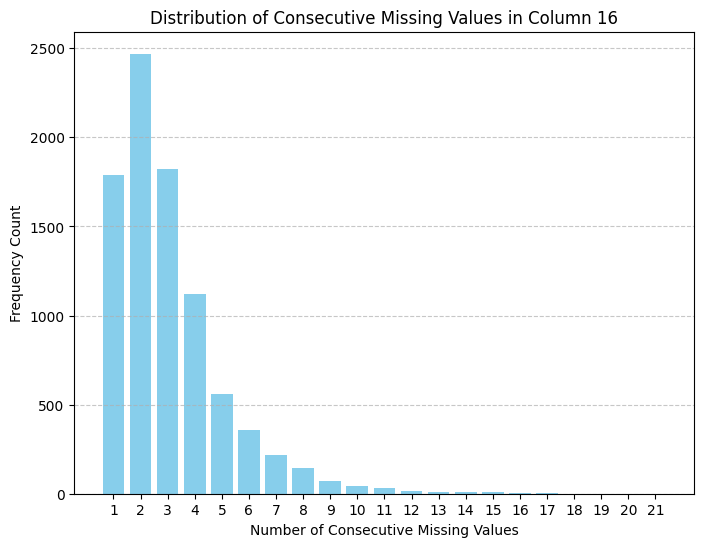

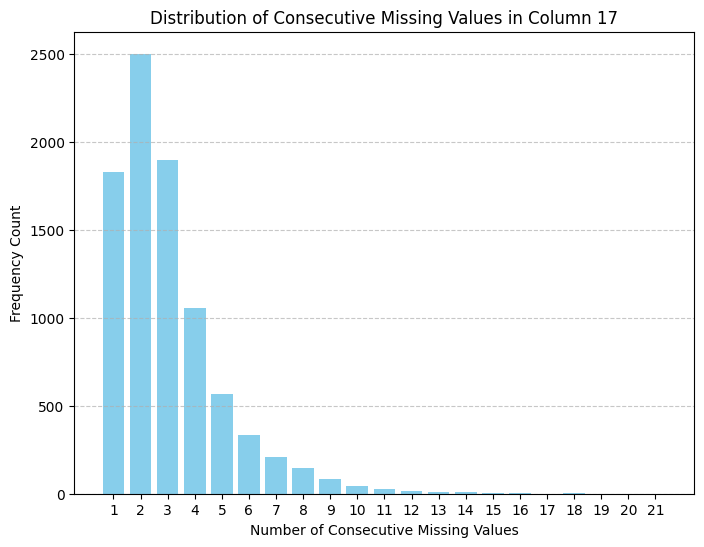

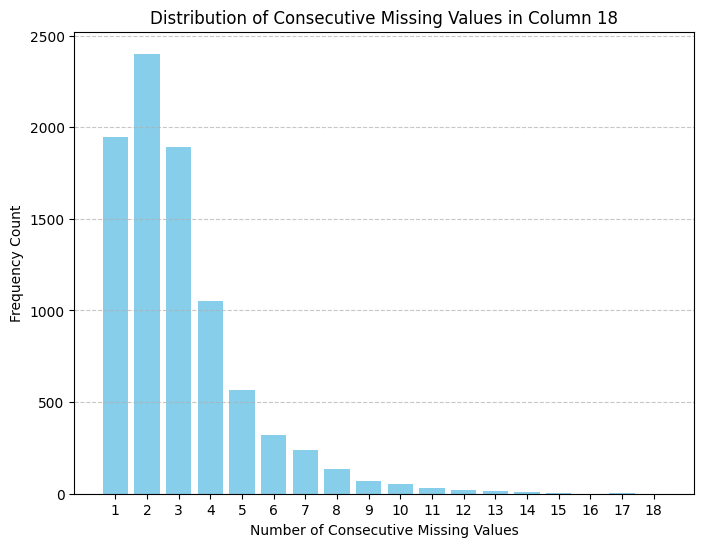

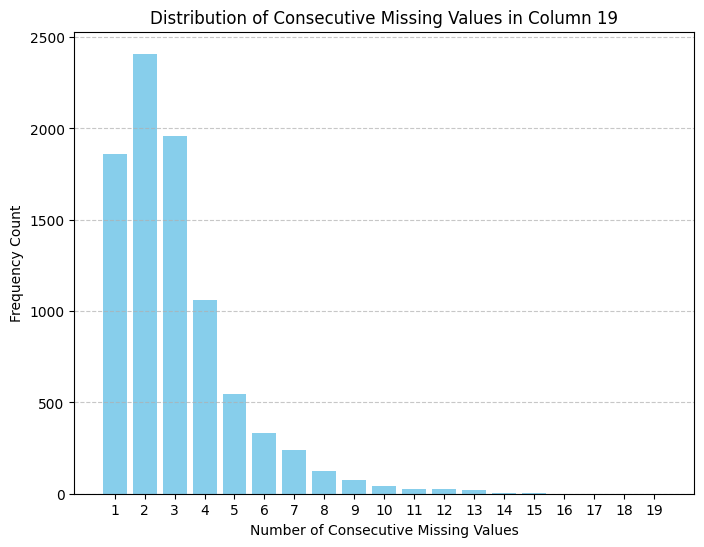

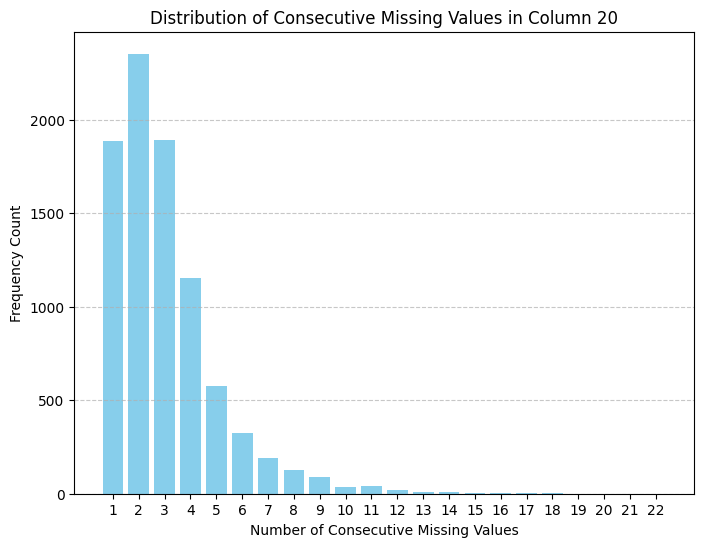

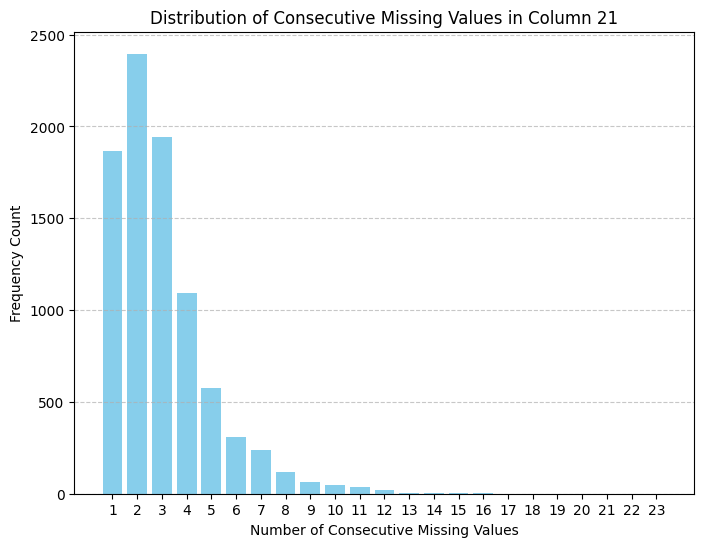

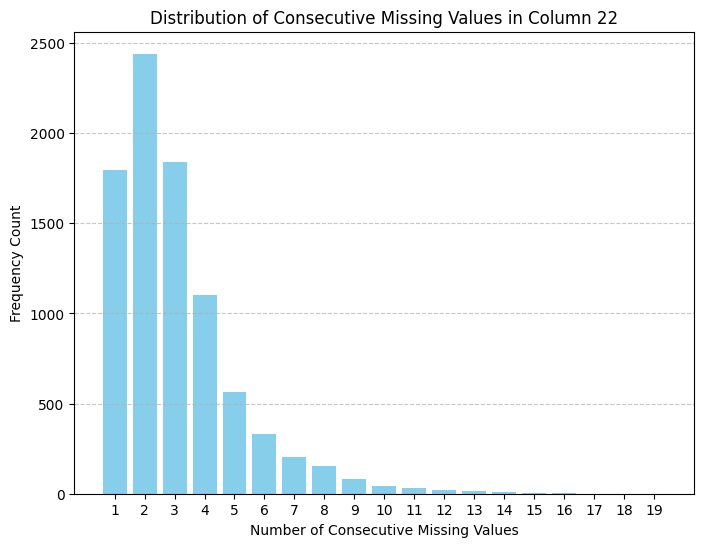

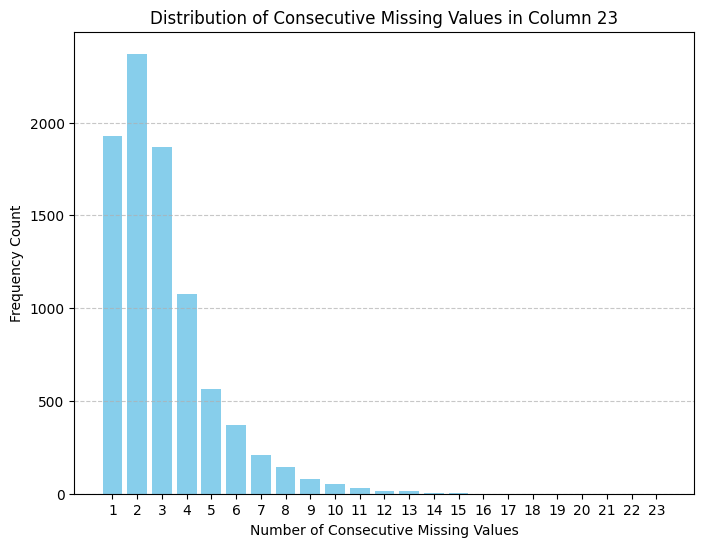

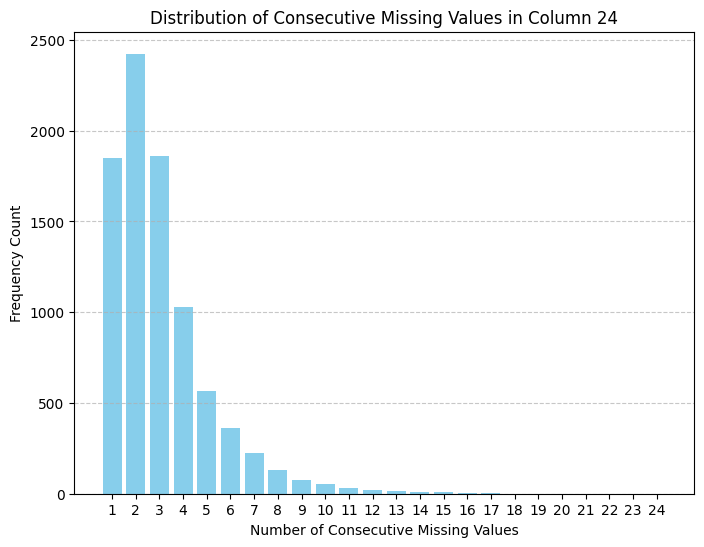

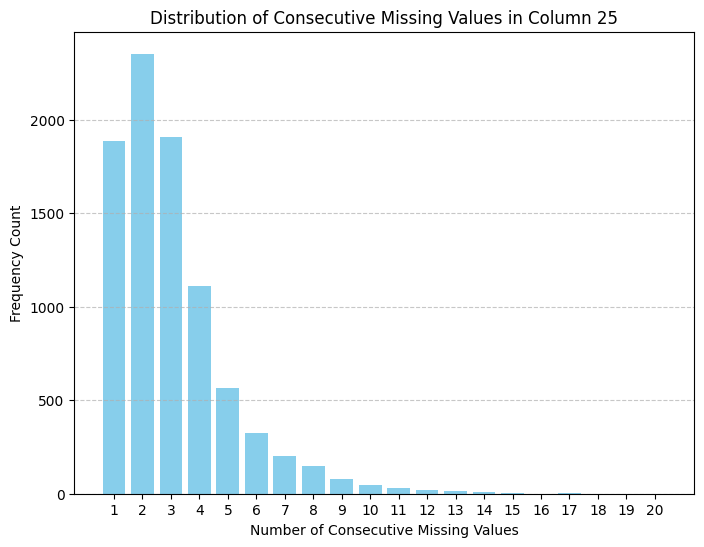

In [4]:
import matplotlib.pyplot as plt

def count_consecutive_missing_values(df, placeholder_value):
    consecutive_counts = {col: {} for col in df.columns}
    for col in df.columns:
        consecutive_count = 0
        for i in range(len(df)):
            if df.at[i, col] == placeholder_value:
                consecutive_count += 1
            else:
                if consecutive_count > 0:
                    consecutive_counts[col][consecutive_count] = consecutive_counts[col].get(consecutive_count, 0) + 1
                consecutive_count = 0
        if consecutive_count > 0:
            consecutive_counts[col][consecutive_count] = consecutive_counts[col].get(consecutive_count, 0) + 1
    return consecutive_counts

# Assuming you have already modified the dataset and have 'modified_dataset_with_consecutive_missing' DataFrame
modified_dataset_with_consecutive_missing = pd.read_csv('../data/26 sensors/missing sequence with probability/speedx26_train_with_missing_1_2.csv', header=None)

# Count consecutive missing values
consecutive_counts = count_consecutive_missing_values(modified_dataset_with_consecutive_missing, placeholder_value)

# Plotting the distribution
for col, counts in consecutive_counts.items():
    plt.figure(figsize=(8, 6))
    plt.bar(counts.keys(), counts.values(), color='skyblue')
    plt.title(f'Distribution of Consecutive Missing Values in Column {col}')
    plt.xlabel('Number of Consecutive Missing Values')
    plt.ylabel('Frequency Count')
    plt.xticks(range(1, max(counts.keys()) + 1))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


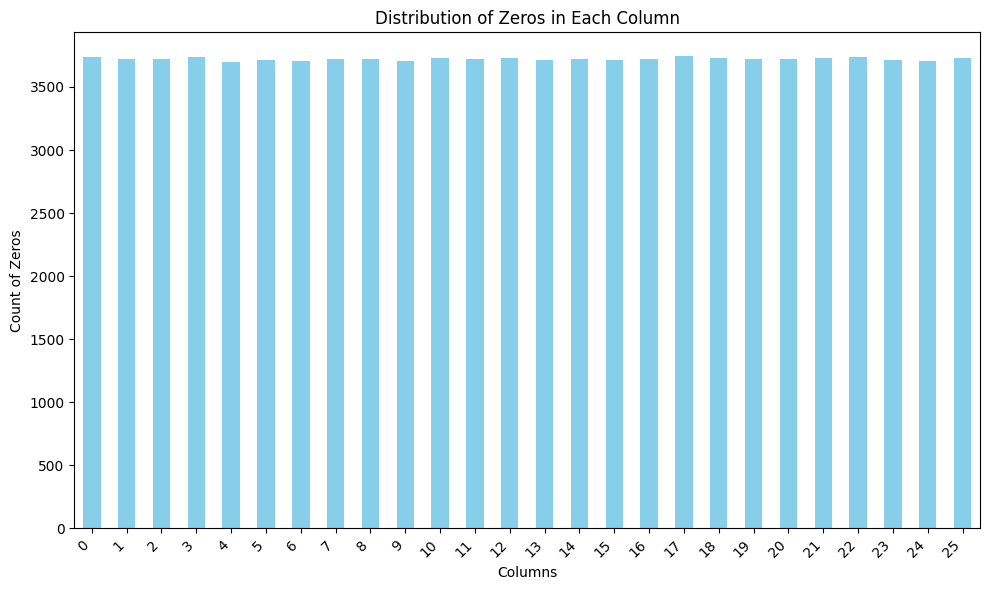

TypeError: 'numpy.float64' object cannot be interpreted as an integer

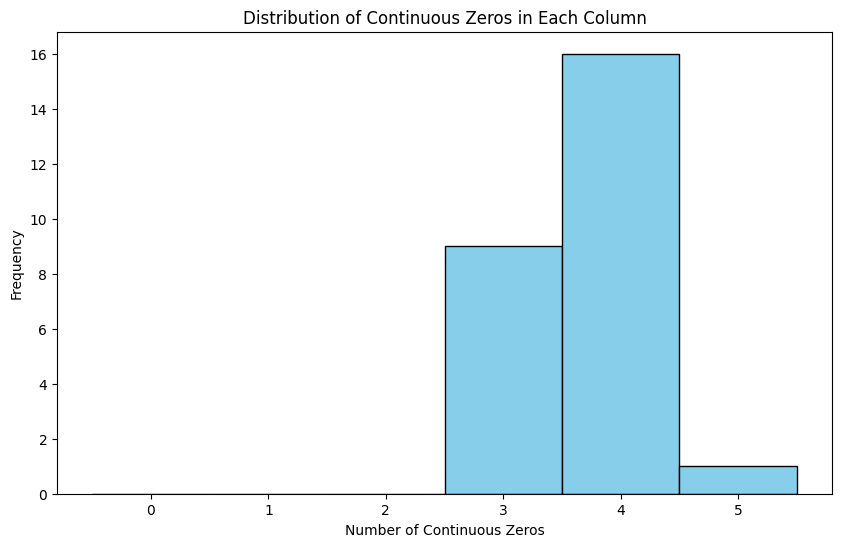

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def count_zeros(df):
    zero_counts = df.eq(0).sum()
    return zero_counts

def plot_zero_distribution(zero_counts):
    plt.figure(figsize=(10, 6))
    zero_counts.plot(kind='bar', color='skyblue')
    plt.title('Distribution of Zeros in Each Column')
    plt.xlabel('Columns')
    plt.ylabel('Count of Zeros')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def count_continuous_zeros(df):
    continuous_zero_counts = pd.Series(index=df.columns, dtype=int)
    for col in df.columns:
        continuous_zeros = df[col].eq(0).astype(int).groupby(df[col].ne(0).cumsum()).sum()
        continuous_zero_counts[col] = continuous_zeros.max() if len(continuous_zeros) > 0 else 0
    return continuous_zero_counts

def plot_continuous_zero_distribution(continuous_zero_counts):
    plt.figure(figsize=(10, 6))
    continuous_zero_counts.plot(kind='hist', bins=np.arange(0, continuous_zero_counts.max() + 2) - 0.5, color='skyblue', edgecolor='black')
    plt.title('Distribution of Continuous Zeros in Each Column')
    plt.xlabel('Number of Continuous Zeros')
    plt.ylabel('Frequency')
    plt.xticks(range(continuous_zero_counts.max() + 1))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Read the dataset
dataset = pd.read_csv('../data/26 sensors/missing sequence with probability/speedx26_train_sequence_missing_0.csv', header=None)

# Count zeros in each column
zero_counts = count_zeros(dataset)

# Plot distribution of zeros
plot_zero_distribution(zero_counts)

# Count continuous zeros in each column
continuous_zero_counts = count_continuous_zeros(dataset)

# Plot distribution of continuous zeros
plot_continuous_zero_distribution(continuous_zero_counts)
